# Simulation and Performance Evaluation - Homework 2

### University of Trento - A.Y. 2019 / 2020

Lotito Quintino Francesco - 215032

Zanella Davide - 211463

---

**Important:** we delivered two files, a .ipynb file (jupyter notebook) and a .html file (export of the notebook), if the .ipynb file is run we expect the datasets to be in the same directory of this notebook in order to be read as input.

## Exercise 1

### Problem statement

Load the data from the CSV file `data_ex1.csv`. This data represents measurements of some quantity over a few days. In each line: the 1st value refers to the time of the measurement; the 2nd value is the measurement output. If you draw a scatter plot, you should see a clear trend in the data.

1. Use least squares to remove the trend. You only need polynomial functions for this.
2. After having verified that a good value for the maximum degree of the the polynomial is 5, remove the trend from the data and fit a Gaussian distribution to the resulting dataset.
3. Give the mean and variance of the distribution, and draw a QQ-plot to determine if the Gaussian approx-imation holds. Give a prediction interval for future samples from this Gaussian distribution.
4. Discuss what would happen if you fit a polynomial of degree different than 5 to the data.

### Solution

In [260]:
def load():
    file = open("data_ex1.csv", "r")
    values = [[float(x) for x in line.split(",")] for line in file.readlines()]
    return values

In [261]:
values = load()
values = sorted(values, key=lambda x: x[0])

x_vals = [v[0] for v in values]
y_vals = [v[1] for v in values]

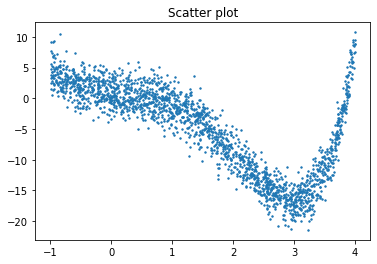

In [262]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x_vals, y_vals, s=2)

plt.title('Scatter plot')
plt.show()

In [263]:
def compute_A_row(x, max_degree):
    row = []
    for d in range(max_degree):
        row.append(x**d)
    return row

In [264]:
def compute_A_matrix(max_degree):
    return [compute_A_row(x, max_degree+1) for x in x_vals]

In [265]:
import numpy as np

def compute_b(A):
    y = np.array(y_vals)

    A = np.array(A)
    A_tr = A.transpose()
    b = np.linalg.inv(A_tr.dot(A)).dot(A_tr).dot(y)
    print("Values of b:", b)
    return b

In [266]:
def compute_new_y_values(b):
    y_new = []

    for x in x_vals:
        new_val = 0
        for d in range(len(b)):
            new_val += b[d] * x**d
        y_new.append(new_val)
    return y_new

In [267]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(y_new, title):
    plt.scatter(x_vals, y_vals, s=2)
    plt.plot(x_vals, y_new, color="red")

    plt.title(title)
    plt.show()

Values of b: [ 0.29655431 -3.55044678]


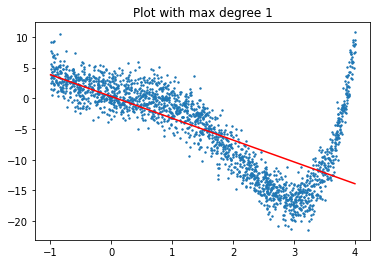

Values of b: [ 0.43139176 -6.34708307  0.93642448]


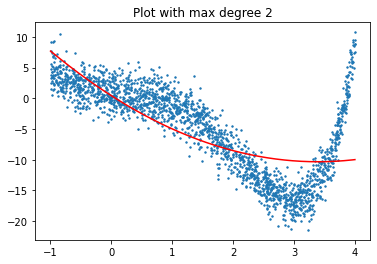

Values of b: [ 3.63422873 -2.06778453 -5.58946838  1.46240799]


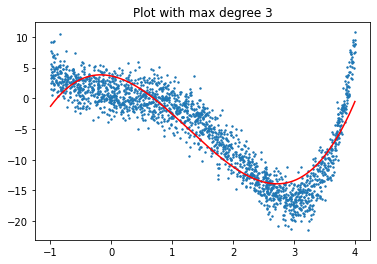

Values of b: [ 0.68546596  0.14871081  1.07905776 -3.4942759   0.82915681]


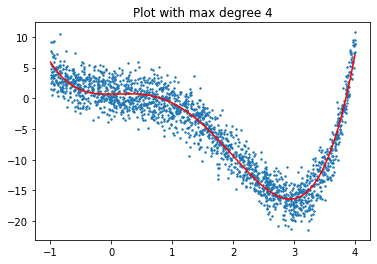

Values of b: [ 0.88415614 -1.24738699  0.85034945 -1.73812648 -0.03252931  0.11600292]


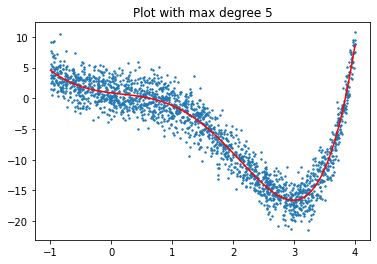

Values of b: [ 0.91830147 -1.06430836  0.60081638 -1.91905017  0.25470207  0.01270557
  0.01153906]


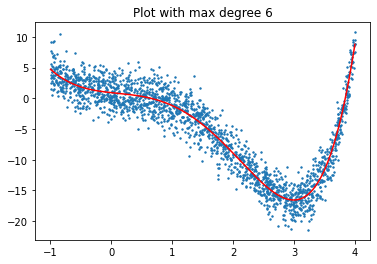

Values of b: [ 0.83813988 -1.08421264  1.17876158 -2.16821912 -0.20930899  0.42673097
 -0.10640787  0.01129662]


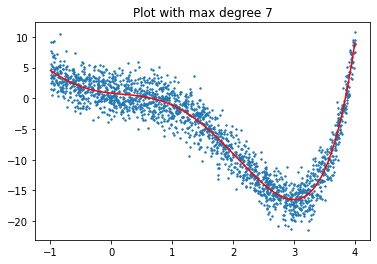

Values of b: [ 0.88578042 -1.31604751  0.82505615 -1.30932995 -0.20320855 -0.2205809
  0.29320778 -0.08260235  0.00785431]


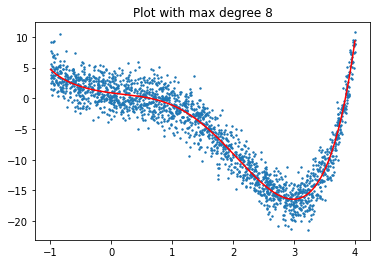

Values of b: [ 0.87811532 -1.537507    0.99168623 -0.58194995 -0.90627299 -0.50523352
  0.87941702 -0.35735787  0.06255979 -0.00405017]


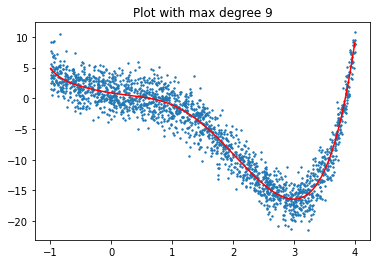

In [268]:
%matplotlib inline

for d in range(1, 10):
    A = compute_A_matrix(d)
    b = compute_b(A)
    y_new = compute_new_y_values(b)
    plot(y_new, 'Plot with max degree {}'.format(d))

Now we remove the trend after choosing 5 as the maximum degree

Values of b: [ 0.88415614 -1.24738699  0.85034945 -1.73812648 -0.03252931  0.11600292]


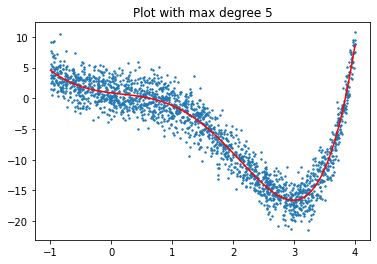

In [269]:
degree = 5
A = compute_A_matrix(degree)
b = compute_b(A)
y_new = compute_new_y_values(b)
plot(y_new, 'Plot with max degree {}'.format(degree))

In [270]:
y_vals = [y_vals[i] - y_new[i] for i in range(len(y_vals))]

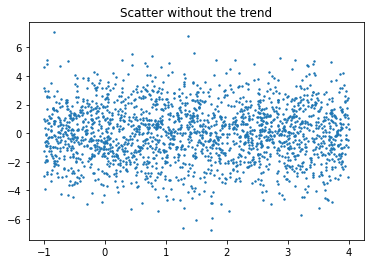

In [271]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x_vals, y_vals, s=2)

plt.title('Scatter without the trend')
plt.show()

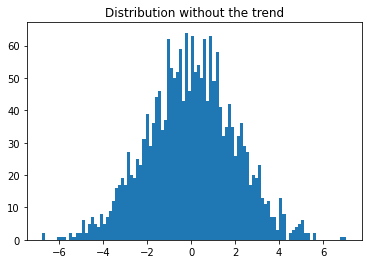

In [272]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(y_vals, bins=100)

plt.title('Distribution without the trend')
plt.show()

In [273]:
def compute_mean(values):
    tot = 0
    for i in values:
        tot += i
    return tot / len(values)

In [274]:
from math import sqrt

def compute_std_dev(values):
    mean = compute_mean(values)
    tot = 0
    for i in values:
        tot += (i - mean) ** 2
    return sqrt(tot / len(values))

In [275]:
mean = compute_mean(y_vals)
std_dev = compute_std_dev(y_vals)

print("Gaussian mean:", mean)
print("Gaussian standard deviation:", std_dev)

Gaussian mean: 1.420435014054533e-11
Gaussian standard deviation: 1.9974810020173022


In [276]:
data = [[i / (len(x_vals) + 1), x_vals[i]] for i in range(len(x_vals))]

data = sorted(data, key=lambda d: d[1])

x_qq = [d[0] for d in data]
y_qq = [d[1] for d in data]

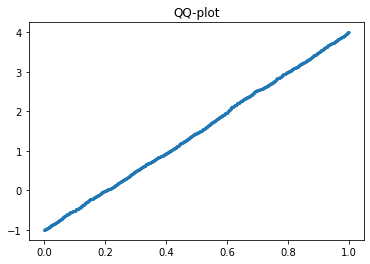

In [277]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x_qq, y_qq, s=2)

plt.title('QQ-plot')
plt.show()

In [278]:
def compute_student_std_dev(values):
    mean = compute_mean(values)
    tot = 0
    for i in values:
        tot += (i - mean) ** 2
    return sqrt(tot / (len(values)-1))

In [279]:
student_std = compute_student_std_dev(y_vals)

print("Student n-1 standard deviation:", student_std)

pi_low = mean - 1.96*student_std
pi_up = mean + 1.96*student_std

print("Prediction interval 95%: [{}, {}]".format(pi_low, pi_up))

Student n-1 standard deviation: 1.9979805596097113
Prediction interval 95%: [-3.91604189682083, 3.9160418968492383]


## Exercise 2

### Problem statement

Load the data from the CSV file `data_ex2.csv`. These are samples from three different, independent Gaussian distributions, all mixed together.

1. Implement the Expectation-Maximization algorithm to fit a mixture of three Gaussian distributions to the data. Try both with and without the prior update step. Discuss the results.
2. Give the parameters of the distributions thus found, and plot the corresponding PDFs on top of the empirical PDFs of the data (e.g., the histogram).

### Solution

In [280]:
def load():
    file = open("data_ex2.csv", "r")
    values = [float(x) for x in file.readlines()]
    return values

In [281]:
values = load()

print("Numer of samples:", len(values))

Numer of samples: 8478


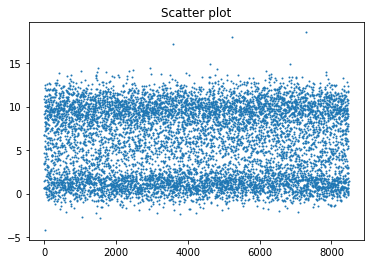

In [282]:
%matplotlib inline
import matplotlib.pyplot as plt

x = range(len(values))

plt.scatter(x, values, s=1)

plt.title('Scatter plot')
plt.show()

In [283]:
from math import sqrt, exp, pi

def prob_x_given_class(x, mean, std):
    return 1 / (sqrt(2*pi) * std) * exp(-(x - mean)**2 / (2 * std**2))

In [284]:
def prob_class_given_x(x, class_idx, means, std_devs, probs):
    all_classes = []
    for i in range(len(probs)):
        all_classes.append(prob_x_given_class(x, means[i], std_devs[i]) * probs[i])
    
    return (all_classes[class_idx]) / sum(all_classes)

In [285]:
def compute_mean_of_class(class_idx, x_probs):
    num = sum([x_probs[i][class_idx]*values[i] for i in range(len(values))])
    den = sum([x_probs[i][class_idx] for i in range(len(values))])
    return num/den

In [286]:
def compute_std_dev_of_cass(class_idx, means, x_probs):
    mean = means[class_idx]
    num = sum([x_probs[i][class_idx]*(values[i] - mean)**2 for i in range(len(values))])
    den = sum([x_probs[i][class_idx] for i in range(len(values))])
    return sqrt(num/den)

In [287]:
def compute_prior_update(class_idx, x_probs):
    tot = sum([x_probs[i][class_idx] for i in range(len(values))])
    return tot / len(values)

In [288]:
def compute_EM(iterations, prior_update=False):
    probs = [1/3] * 3

    min_mean = min(values)
    incr_mean = (max(values) - min(values)) / 3
    means = [min_mean, min_mean + incr_mean, min_mean + 2*incr_mean]
    std_devs = [10] * 3

    x_probs = [[1/3] * len(probs)] * len(values)
    
    for _ in range(iterations):
        for i in range(len(values)):
            x_probs[i] = [prob_class_given_x(values[i], c, means, std_devs, probs) for c in range(len(probs))]

        means = [compute_mean_of_class(c, x_probs) for c in range(len(probs))]
        std_devs = [compute_std_dev_of_cass(c, means, x_probs) for c in range(len(probs))]
        
        if prior_update:
            probs = [compute_prior_update(c, x_probs) for c in range(len(probs))]
            
    return x_probs, means, std_devs, probs

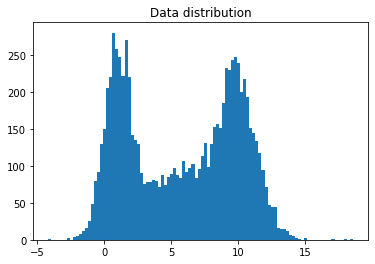

In [289]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(values, bins=100)

plt.title('Data distribution')
plt.show()

In [290]:
x_probs, means, std_devs, probs = compute_EM(300)

print("Gaussians means:", means)
print("Gaussians standard deviations:", std_devs)
print("Gaussians probabilities:", probs)

Gaussians means: [1.012777874692857, 6.199781212339466, 10.045416880889956]
Gaussians standard deviations: [1.012743403666971, 2.810721569256861, 1.336626478148736]
Gaussians probabilities: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


In [291]:
def get_elems_class(class_idx, x_probs):
    result = []
    for i in range(len(values)):
        if np.argmax(x_probs[i]) == class_idx:
            result.append(values[i])

    return result

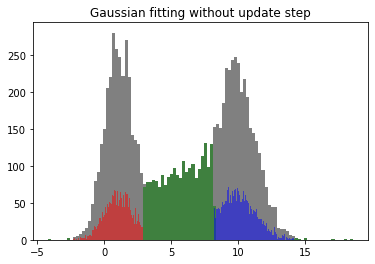

In [292]:
%matplotlib inline
import matplotlib.pyplot as plt

red = get_elems_class(0, x_probs)
green = get_elems_class(1, x_probs)
blue = get_elems_class(2, x_probs)

plt.hist(values, bins=100, color="gray")

plt.hist(red, bins=100, color="red", alpha=0.5)
plt.hist(green, bins=100, color="green", alpha=0.5)
plt.hist(blue, bins=100, color="blue", alpha=0.5)

plt.title('Gaussian fitting without update step')
plt.show()

In [296]:
x_probs, means, std_devs, probs = compute_EM(300, True)

print("Gaussians means:", means)
print("Gaussians standard deviations:", std_devs)
print("Gaussians probabilities:", probs)

Gaussians means: [0.9885967207824699, 6.051301901825398, 10.034687047633144]
Gaussians standard deviations: [0.9800493036324575, 2.933591853637722, 1.3299428739981558]
Gaussians probabilities: [0.31207902135047827, 0.353225677500929, 0.33469530114859164]


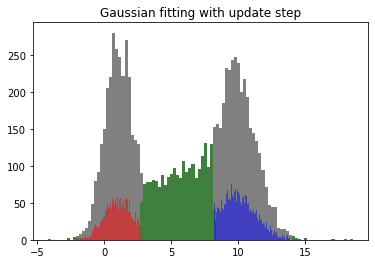

In [297]:
%matplotlib inline
import matplotlib.pyplot as plt

red = get_elems_class(0, x_probs)
green = get_elems_class(1, x_probs)
blue = get_elems_class(2, x_probs)


plt.hist(values, bins=100, color="gray")

plt.hist(red, bins=100, color="red", alpha=0.5)
plt.hist(green, bins=100, color="green", alpha=0.5)
plt.hist(blue, bins=100, color="blue", alpha=0.5)

plt.title('Gaussian fitting with update step')
plt.show()

## Exercise 4

### Problem statement

In a popular board game, the players roll two dice at every turn. They want to test the fairness of the dice, so they note the number of occurrences of each possible result, from 2 to 12. The collected data are as follows

<table>
    <tr style="border-bottom:1px solid black">
        <td style="border-right:1px solid black">
            value
        </td>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td>5</td>
        <td>6</td>
        <td>7</td>
        <td>8</td>
        <td>9</td>
        <td>10</td>
        <td>11</td>
        <td>12</td>
    </tr>
    <tr>
        <td style="border-right:1px solid black">
            # occurrences
        </td>
        <td>1</td>
        <td>4</td>
        <td>2</td>
        <td>7</td>
        <td>10</td>
        <td>9</td>
        <td>9</td>
        <td>14</td>
        <td>7</td>
        <td>5</td>
        <td>3</td>
    </tr>
</table>


1. Find the probability mass function of the distribution
2. Run a chi-squared test on this data to check if it is in accordance with the discrete triangular distribution that characterizes a 2-dice roll:

$$P[X=k] = \frac{1}{36} \cdot
\left\{
\begin{array}{ll}
      k-1, & k= 2,...,7 \\
      13−k, & k= 8,9,...,12 \\
\end{array} 
\right.
$$

Discuss the result of the test.

### Solution

In [301]:
values = [2] + [3]*4 + [4]*2 + [5]*7 + [6]*10 + [7]*9 + [8]*9 + [9]*14 + [10]*7 + [11]*5 + [12]*3

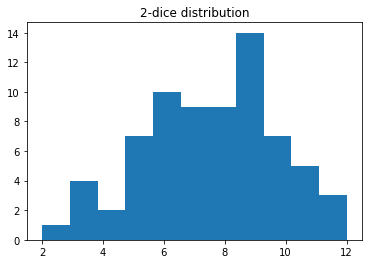

In [305]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.hist(values, bins=11)

plt.title('2-dice distribution')
plt.show()

In [306]:
def prob_mass_function(n):
    return values.count(n) / len(values)

In [307]:
for i in range(2, 13):
    p = prob_mass_function(i)
    print("Prob for {} id: {}".format(i, p))

Prob for 2 id: 0.014084507042253521
Prob for 3 id: 0.056338028169014086
Prob for 4 id: 0.028169014084507043
Prob for 5 id: 0.09859154929577464
Prob for 6 id: 0.14084507042253522
Prob for 7 id: 0.1267605633802817
Prob for 8 id: 0.1267605633802817
Prob for 9 id: 0.19718309859154928
Prob for 10 id: 0.09859154929577464
Prob for 11 id: 0.07042253521126761
Prob for 12 id: 0.04225352112676056


In [308]:
def triangolar_distribution(k):
    if k <= 7 and k >= 2:
        v = k - 1
    elif k >= 8 and k <= 12:
        v = 13 - k
    else:
        return None
    return 1/36 * v 

In [309]:
T = 0
for i in range(2, 13):
    tr = triangolar_distribution(i)
    T += (prob_mass_function(i) - tr)**2 / tr
    
print("Value of T:", T)

Value of T: 0.13632215830192423


The $T$ value is small, meaning that we can accept the hypothesis and state that the chosen distribution correctly models the data.

We can calculate the $p$-value by looking at the tables of the chi-squared with $k - 1$ degrees of freedom, so 10 degrees of freedom since $k = 11$.

$P\{\chi_{k-1}^2 \geq T\} = 1$

As previously anticipated, the hypothesis can be accepted because we obtained a probability of $1$ that the triangular distribution behaves the same as our distribution. 

## Exercise 5

### Problem statement

Compute an approximate value for $\pi$ by using Monte-Carlo simulation to approximate the ratio between the area of a circle of radius $1$ to the area of the square circumscribed to it (which has side length equal to $2$).

1. Set a stopping rule in terms of the confidence interval for the success probability (where a success occurs if a point falls within the circle). Make an algorithm that keeps drawing additional points until the stopping rule is satisfied.

### Solution

In [3]:
import random
import math

In [4]:
def sample():
    x = random.random()
    y = random.random()
    return x, y

In [5]:
def is_inside(x, y, r):
    if math.sqrt(x**2 + y**2) < r:
        return True
    else:
        return False

In [6]:
def compute_mean(values):
    tot = 0
    for i in values:
        tot += i
    return tot / len(values)

In [7]:
def compute_std_dev(values):
    mean = compute_mean(values)
    tot = 0
    for i in values:
        tot += (i - mean) ** 2
    return math.sqrt(tot / len(values))

In [8]:
def mean_interval(data, gamma):
    eta = None
    if gamma == 0.95:
        eta = 1.960
    elif gamma == 0.99:
        eta = 2.576
    else:
        # in these excercises we are only interested in 95% and 99% confidence
        pass
    mean = compute_mean(data)
    std_dev = compute_std_dev(data)
    incr = eta * std_dev / math.sqrt(len(data))
    return mean - incr, mean + incr

In [27]:
in_points = 0
r = 1
tot = 0
outcomes = []

while True:
    x, y = sample()
    tot += 1
    
    if is_inside(x, y, r):
        in_points += 1
        outcomes.append(1)
    else:
        outcomes.append(0)
    
    a, b = mean_interval(outcomes, 0.99)
        
    if b - a <= 0.015 and tot > 1000:
        break
    
    if tot % 1000 == 0:
        print("--- Iteration: {} ---".format(tot))
        print("C.I. 95%: [{}, {}]".format(a, b))
        print("Approximation of pi: {}".format(4 * (in_points / tot)))

print("\n+++ Stopping rule triggered after {} iterations +++".format(tot))
print("[{}, {}]".format(a, b))
print("{}".format(4 * (in_points / tot)))

Iteration: 1000
C.I. 95%: [0.7578787099806786, 0.8241212900193214]
Approximation of pi: 3.164
Iteration: 2000
C.I. 95%: [0.7634165124858941, 0.8105834875141059]
Approximation of pi: 3.148
Iteration: 3000
C.I. 95%: [0.772566560015811, 0.8107667733175222]
Approximation of pi: 3.1666666666666665
Iteration: 4000
C.I. 95%: [0.7659539447823013, 0.7995460552176986]
Approximation of pi: 3.131
Iteration: 5000
C.I. 95%: [0.7644991092070708, 0.7947008907929292]
Approximation of pi: 3.1184
Iteration: 6000
C.I. 95%: [0.7687803814338733, 0.7962196185661267]
Approximation of pi: 3.13
Iteration: 7000
C.I. 95%: [0.7704545348929416, 0.7958311793927727]
Approximation of pi: 3.1325714285714286
Iteration: 8000
C.I. 95%: [0.7716382349944038, 0.7953617650055962]
Approximation of pi: 3.134
Iteration: 9000
C.I. 95%: [0.7712413899465029, 0.7936474989423861]
Approximation of pi: 3.129777777777778
Iteration: 10000
C.I. 95%: [0.7719745935894285, 0.7932254064105714]
Approximation of pi: 3.1304
Iteration: 11000
C.I.